In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
import tarfile
tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
for member in tar.getmembers():
     f = tar.extractfile(member)
     if f is not None:
         content = f.read()

In [0]:
tar.extractall()

In [0]:
def sklearn_metrics(true, predicted):
    ac = accuracy_score(true, predicted)
    p = precision_score(true, predicted, average='binary')
    r = recall_score(true, predicted, average='binary')
    f1 = f1_score(true, predicted, average='binary')
    print('Accuracy = {0:1.4f}'.format(ac))
    print('F1 = {0:1.4f}, Precision = {1:1.4f}, Recall = {2:1.4f}'.format(f1, p, r))

In [0]:
train = datasets.load_files('aclImdb/train/', categories = ['neg', 'pos'], random_state = 42)
test = datasets.load_files('aclImdb/test/', random_state = 42)

In [0]:
tfidf_vect = TfidfVectorizer(max_features=100000, min_df=5, max_df=0.4, ngram_range=(1,2))
X_train = tfidf_vect.fit_transform(train.data)
X_test = tfidf_vect.transform(test.data)

**Logistic regression**

In [0]:
clf1 = LogisticRegression().fit(X_train, train.target)

In [0]:
predicted_log = clf1.predict(X_test)

In [134]:
sklearn_metrics(test.target, predicted_log)

Accuracy = 0.8965
F1 = 0.8968, Precision = 0.8939, Recall = 0.8998


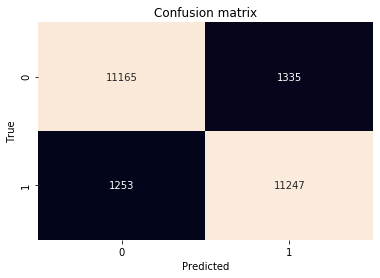

In [97]:
sns.heatmap(data=confusion_matrix(test.target, predicted_log), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

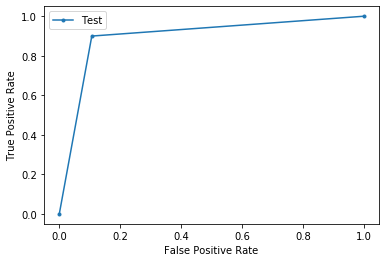

In [92]:
y_true = test.target
y_predicted = predicted_log
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [87]:
print(roc_auc_score(y_true, y_predicted))

0.89648



**KNeighborsClassifier**

In [0]:
clf2 = KNeighborsClassifier().fit(X_train, train.target)

In [0]:
predicted_kn = clf2.predict(X_test)

In [131]:
sklearn_metrics(test.target, predicted_kn)

Accuracy = 0.6896
F1 = 0.6901, Precision = 0.6888, Recall = 0.6914


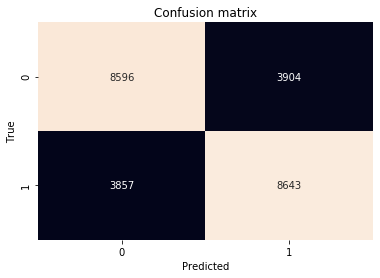

In [99]:
sns.heatmap(data=confusion_matrix(test.target, predicted_kn), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

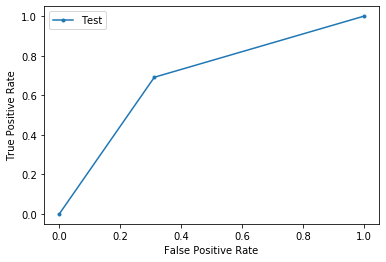

In [95]:
y_true = test.target
y_predicted = predicted_kn
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [96]:
print(roc_auc_score(y_true, y_predicted))

0.6895600000000001


**Decision Tree**

In [0]:
clf3 = DecisionTreeClassifier().fit(X_train, train.target)

In [0]:
predicted_dt = clf3.predict(X_test)

In [128]:
sklearn_metrics(test.target, predicted_dt)

Accuracy = 0.7072
F1 = 0.7062, Precision = 0.7086, Recall = 0.7038


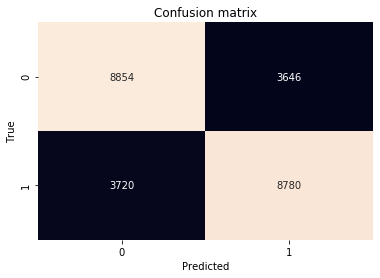

In [105]:
sns.heatmap(data=confusion_matrix(test.target, predicted_dt), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

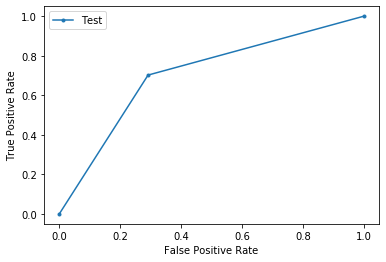

In [106]:
y_true = test.target
y_predicted = predicted_dt
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [107]:
print(roc_auc_score(y_true, y_predicted))

0.70536


**Подсчет точности, полноты и F-меры**

In [0]:
def my_metrics(y_true, y_predicted):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_predicted)): 
        if y_true[i]==y_predicted[i]==1:
           TP += 1
        if y_predicted[i]==1 and y_true[i]!=y_predicted[i]:
           FP += 1
        if y_true[i]==y_predicted[i]==0:
           TN += 1
        if y_predicted[i]==0 and y_true[i]!=y_predicted[i]:
           FN += 1
    
    PR = TP/(TP+FP)
    R = TP/(TP+FN)
    F = (2*PR*R)/(PR+R)

    print('TP: ', TP)
    print('FP: ', FP)
    print('TN: ', TN)
    print('FN: ', FN)
    print('Precision: ', PR)
    print('Recall: ', R)
    print('F-score: ', F)

In [124]:
#Decision tree
my_metrics(y_true, y_predicted)

TP:  8780
FP:  3646
TN:  8854
FN:  3720
Precision:  0.7065829711894415
Recall:  0.7024
F-score:  0.7044852764181979


**Вывод**

Логистическая регрессия судя по метрикам справилась лучше других классификаторов

**15 самых негативных рецензий модели**

In [0]:
probabilities = clf1.predict_prob(X_test)

In [116]:
negative_probs = {i : probabilities[i][0] for i in range(len(probabilities))}
most_negative = []
for n in sorted(negative_probs.items() ,  key=lambda x: x[1], reverse=True):
    most_negative.append(n[0])
for i in most_negative[:15]:
    print('{}\n{}\n'.format(i, test.data[i]))

14717
b'As you can tell from the other comments, this movie is just about the WORST film ever made. Let me see how many different words I can use to describe it: Boring, Unbearable, Laughable, Lousy, Stupid, Horrible.....<br /><br />I could go on with such descriptions but you probably get the point.<br /><br />I would have given this a 0, if possible--bad acting, bad directing, bad production, bad plot.<br /><br />This was made in 2001 and it looks more like 1965. Very low budget, boring plot, horrible acting, really bad special effects, etc...<br /><br />I rarely ever see a Sci-Fi film I absolutely think is this bad. I mean this is pure garbage. It has nothing going for it either. As far as a "B-movie" this is the very bottom of the lot.<br /><br />I think I would be more entertained by staring at a blank piece of paper for 90 minutes. Junk like this gives good low-budget "B" movies a bad name. This makes Ed Wood movies look good.<br /><br />The thing about watching direct-to-video m

**15 самых позитивных рецензий модели**

In [122]:
positive_probs = {i : probabilities[i][1] for i in range(len(probabilities))}
most_positive = []
for n in sorted(positive_probs.items() ,  key=lambda x: x[1], reverse=True):
    most_positive.append(n[0])
for i in most_positive[:15]:
    print('{}\n{}\n'.format(i, test.data[i]))

24154
b"This is one of Bruce's most underrated films in my opinion, its an awesome heartwarming film, with a neat story and an amazing performance from Bruce Willis!. All the characters are great, and I thought Willis and Spencer Breslin were just awesome together, plus Bruce Willis is simply amazing in this!. This is definitely one of Bruce's best comedic performances (The waaaaaaaaaamabulance thing was great) and I thought it was very well written and made as well, plus The finale is especially cool!. It's good natured and it was cool how you can see Russell's (Willis) character change throughout the film! plus the ending was pretty good. I think this should be higher then 6.0 and it's one of the best Disney films I have ever seen! plus it has many surprising moments throughout. All the characters are extremely likable, and it also has a cute love story angle too it as well, plus Bruce and Spencer Breslin both had some really funny lines (Holy Smokes!). This is one of Bruce's most un